In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


## Animation: Linear Regression Fitting Step-by-Step

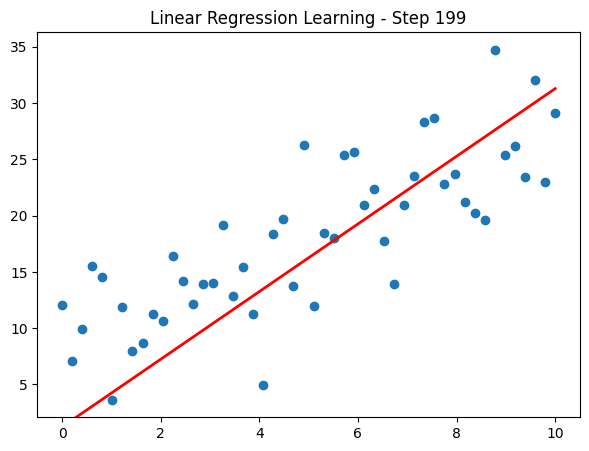

In [ ]:
# Create folder if not exists
os.makedirs("gifs", exist_ok=True)

# Generate sample data
np.random.seed(0)
X = np.linspace(0, 10, 50)
y = 2.5 * X + 5 + np.random.randn(50) * 4

# Gradient descent
m, b = 0, 0
lr = 0.001
iterations = 200

m_list, b_list = [], []

for _ in range(iterations):
    y_pred = m * X + b
    error_m = (-2/len(X)) * np.sum(X * (y - y_pred))
    error_b = (-2/len(X)) * np.sum(y - y_pred)

    m -= lr * error_m
    b -= lr * error_b

    m_list.append(m)
    b_list.append(b)

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(X, y)
line, = ax.plot([], [], color='red', linewidth=2)

def update(i):
    y_pred = m_list[i] * X + b_list[i]
    line.set_data(X, y_pred)
    ax.set_title(f"Linear Regression Learning - Step {i}")
    return line,

ani = FuncAnimation(fig, update, frames=len(m_list), interval=50)

# ✅ Save GIF BEFORE plt.show()
ani.save("gifs/lr.gif", writer="pillow")

plt.show()


## Animation: K-NN Classification Decision Boundary

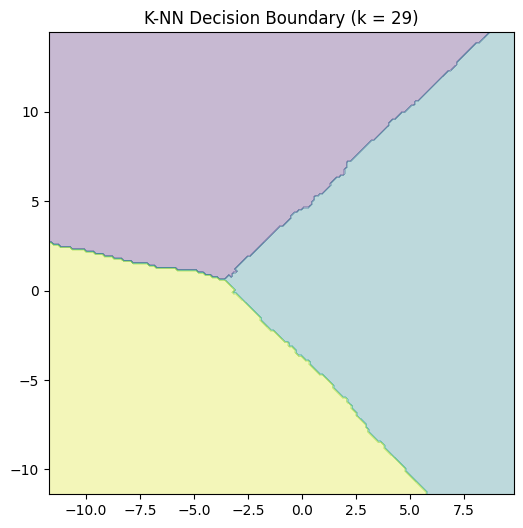

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

os.makedirs("gifs", exist_ok=True)

# Dataset
X, y = make_blobs(n_samples=200, centers=3, random_state=42, cluster_std=1.8)

# Grid for decision boundary
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0], X[:,1], c=y, s=40)

k_values = list(range(1, 30))

def update(i):
    # Remove previous contour layers safely
    for coll in ax.collections:
        coll.remove()

    k = k_values[i]
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = preds.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.set_title(f"K-NN Decision Boundary (k = {k})")

ani = FuncAnimation(fig, update, frames=len(k_values), interval=150)

# Save GIF BEFORE show()
ani.save("gifs/knn_fixed.gif", writer="pillow")

plt.show()
